*Link Dataset: https://www.kaggle.com/c/titanic/data*

*Dataset construido por:*

*Gabriel de Carvalho Vasconcelos gcv@cesar.school*

*Eduardo Vaz de Oliveira Gerab evog@cesar.school*

# **Titanic Dataset**

##**Dicionário de Dados**
| Coluna          | Descrição                                           | Valores          | Tipo de Dado                                            |
| ------------- | --------------------------------------------------- | ---------------- | ------------------------------------------------ |
| Survival      | Sobrevivente                      | 0 = Não, 1 = Sim | Qualitativo e Nominal                    |
| Pclass        | Classe do bilhete                                  | 1 = 1ªClasse, 2 = 2ªClasse, 3 = 3ªClasse | Qualitativo e Ordinal  |
| Sex           | Sexo do passageiro                                 | Male, Female     | Qualitativo e Nominal                                                 |
| Age           | Idade do passageiro                                | Valor numérico   | Numérico           |
| SibSp         | Número de irmãos/cônjuges a bordo                  | Valor numérico   | Qualitativo e Nominal                   |
| Parch         | Número de pais/filhos a bordo                      | Valor numérico   | Qualitativo e Nominal                   |
| Ticket        | Número do bilhete                                  | Valor alfanumérico | Literal |
| Fare          | Tarifa paga pelo passageiro                        | Valor numérico   | Numérico        |
| Cabin         | Número da cabine                                   | Valor alfanumérico | Literal  |
| Embarked      | Porto de embarcação                                | C = Cherbourg, Q = Queenstown, S = Southampton | Qualitativo e Nominal        |

### Mounting & Importing

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import pylab as py
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_predict, cross_val_score

In [ ]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
titanic = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Dados/titanic.csv')

## **Descrição dos Dados**

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## **Tratamento de Dados I**

Após uma análise com relação as variáveis existentes no Dataset, podemos retirar algumas colunas que não vamos utilizar, nem analisar os dados, então, segue as colunas removidas e seus respectivos motivos:



1.   **PassengerId**: Coluna não necessária visto que somente atribui um ID a cada linha do Dataset, porém, já possuimos esta atribuição.
2.   **Ticket**: Valor de String irrelevante devido a baixa otimização de utilização no Dataset.
3.   **Cabin**: Coluna extremamente valiosa com relação a questão de dados, porém, para conseguirmos trabalhar com a mesma, é necessário um mapa do titanic para análisar a importância das cabines com relação as outras variáveis, porém, devido a falta de tempo para análise, decidi retirar.
4.   **Name**: Valor em String díficil de trabalhar a relacionar com outras variáveis, além de ser um valor irrelevante para a análise do Dataset.
5.   **Fare**: Valor com extrema variedade de dados, possuindo pouco padrão para se analisar se tornando muito dificil de trabalhar.
6.   **SibSp**: Coluna que após uma breve análise, possui pouca relação com outras colunas, somente com Parch, além de que, decidi retirar devido a problemas na hora da normalização dos dados do Dataset.
7.   **Parch**: Coluna que após uma breve análise, possui pouca relação com outras colunas, somente com SibSp, além de que, decidi retirar devido a problemas na hora da normalização dos dados do Dataset.









Então, decidi focar nas colunas restantes para construir uma análise mais direcionada e precisa.

In [ ]:
titanic = titanic.drop(columns=['PassengerId', 'Ticket', 'Cabin', 'Name', 'Fare', 'SibSp', 'Parch'])

#### Tratamento de Valores Nulos

In [ ]:
valores_nan = titanic.isnull().sum()
print(valores_nan)

Survived      0
Pclass        0
Sex           0
Age         177
Embarked      2
dtype: int64


Visto que Age possui diversos valores nulos, e informações importantes no Dataset, vamos tratar os valores adicionando a média dos mesmos nesses valores, e então, removendo os valores nulos de Embarked, devido a baixa quantidade de valores NaN no Dataset.

In [ ]:
mean_age = titanic['Age'].mean()
titanic['Age'].fillna(mean_age, inplace=True)
titanic.dropna(axis=0, inplace=True)

### Data Standardization

Como vamos trabalhar com a variável 'Sex' com outras variáveis, é necessário realizar a separação desta coluna em duas no Dataset Titanic, foi utilizado o get_dummies para separar essas variáveis em outras colunas.

Sendo assim foram adicionadas as colunas:

*   Sex_female
*   Sex_male



In [ ]:
titanic = pd.get_dummies(titanic, columns=['Sex'], prefix=['Sexo'])

In [ ]:
titanic.head()

,Survived,Pclass,Age,Embarked,Sexo_female,Sexo_male
0,0,3,22.0,S,0,1
1,1,1,38.0,C,1,0
2,1,3,26.0,S,1,0
3,1,1,35.0,S,1,0
4,0,3,35.0,S,0,1


### Heatmap

Então, para analisarmos a relação de cada variável no Dataset, vamos utilizar o Heatmap para demonstrar a correlação em gráfico.

<ipython-input-16-4d39640add18>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(titanic.corr(), vmin=-1, vmax=1, annot=True)


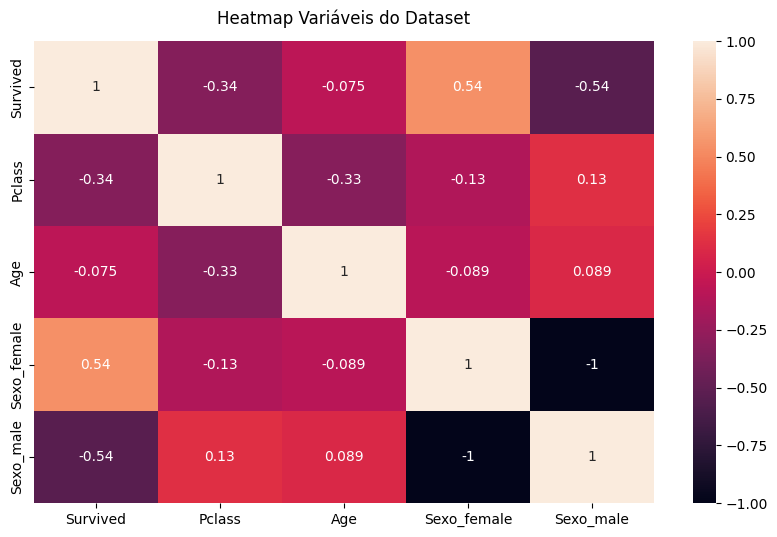

In [ ]:
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(titanic.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Heatmap Variáveis do Dataset', fontdict={'fontsize':12}, pad=12);

Dado a construção do Heatmap de Correlação, vemos que a maior correlação que possuimos são com as seguintes variáveis:

*   *Sex_female* e *Survived*: 0.54
*   *Sex_male* e *Survived*: -0.54
*   *Pclass* e *Survived*: -0.34
*   *Age* e *Pclass*: -0.37

A partir da análise da relação das colunas, podemos propor uma hipótese.
Podemos criar a hipótese de que, baseada nessa informação, podemos dizer que as mulheres tiveram uma porcentagem maior de sobrevivência. E podemos comprovar com a seguinte notícia abaixo.

> - ''Uma das conclusões é que, no naufrágio do Titanic, ocorrido em 1912, a maioria das mulheres e crianças foram salvas (cerca de 70%). Um número alto em comparação com os homens que sobreviveram (20%).''



### Sobreviventes por Sexo
Visto a hipótese acima, podemos analisar a quantidade de homens e mulheres sobreviventes, e, não sobreviventes do Titanic.

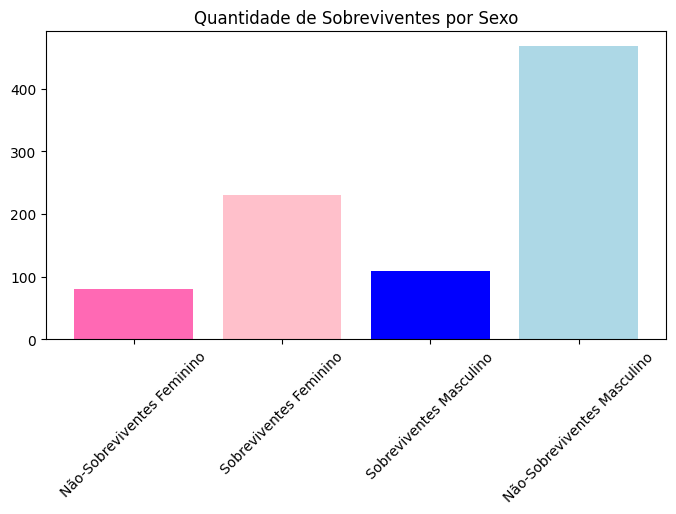

In [ ]:
female_survivors = titanic[titanic['Sexo_female'] == 1]['Survived']
male_survivors = titanic[titanic['Sexo_male'] == 1]['Survived']

female_survivors_count = female_survivors.sum()
female_non_survivors_count = female_survivors.size - female_survivors_count

male_survivors_count = male_survivors.sum()
male_non_survivors_count = male_survivors.size - male_survivors_count

categories = ['Não-Sobreviventes Feminino', 'Sobreviventes Feminino', 'Sobreviventes Masculino', 'Não-Sobreviventes Masculino']
counts = [female_non_survivors_count, female_survivors_count, male_survivors_count, male_non_survivors_count]
colors = ['hotpink', 'pink', 'blue', 'lightblue']

plt.figure(figsize=(8, 4))
plt.bar(categories, counts, color=colors)
plt.title('Quantidade de Sobreviventes por Sexo')

plt.xticks(rotation=45)
plt.show()

*Referência*: https://g1.globo.com/ciencia-e-saude/noticia/2012/07/titanic-foi-excecao-no-perfil-dos-mortos-em-naufragios-diz-pesquisa.html#:~:text=Uma%20das%20conclus%C3%B5es%20%C3%A9%20que,homens%20que%20sobreviveram%20(20%25).

### Não Sobreviventes por Classe

Decidimos separar os números de mortos por classe, isto é, por quanto foi pago na passagem do navio (1ª, 2ª e 3ª classe), para uma melhor visualização e entendimento sobre como se deram as mortes no desastre.

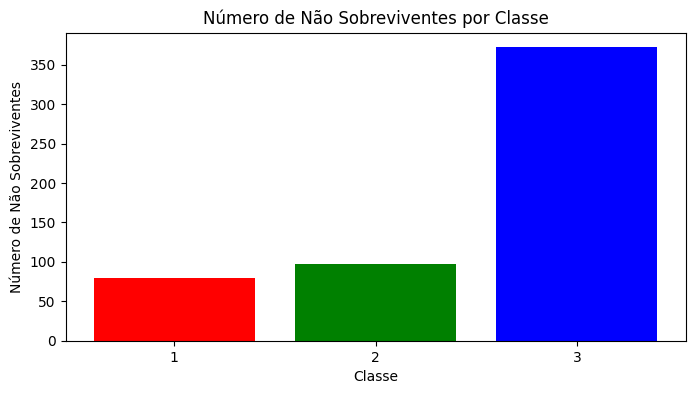

In [ ]:
nao_sobreviventes = titanic[titanic['Survived'] == 0]
contagem_por_classe = nao_sobreviventes['Pclass'].value_counts()

contagem_por_classe = contagem_por_classe.sort_index()

cores = ['red', 'green', 'blue']

plt.figure(figsize=(8, 4))
plt.bar(contagem_por_classe.index, contagem_por_classe.values, tick_label=contagem_por_classe.index, color=cores)
plt.xlabel('Classe')
plt.ylabel('Número de Não Sobreviventes')
plt.title('Número de Não Sobreviventes por Classe')
plt.show()

Como era esperado, até pela própria organização das cabines do navio, a classe 3 foi a que teve um maior número de mortos quando comparada a todas as outras classes. Por outro lado, a que teve o maior numero de sobreviventes foi a classe 1

## **Tratamento de Dados II**

### Normalização dos Dados

Para realizarmos a normalização dos dados no Dataset, precisando tratar as mesmas, então, como Embarked é uma coluna que possui dados em String, vamos tratar separando a em varias colunas, com valores binários para declarar o local de embarque de cada pessoa respectivamente.

In [ ]:
titanic = pd.get_dummies(titanic, columns=['Embarked'], prefix=['Embarque'])

In [ ]:
titanic.head()

,Survived,Pclass,Age,Sexo_female,Sexo_male,Embarque_C,Embarque_Q,Embarque_S
0,0,3,22.0,0,1,0,0,1
1,1,1,38.0,1,0,1,0,0
2,1,3,26.0,1,0,0,0,1
3,1,1,35.0,1,0,0,0,1
4,0,3,35.0,0,1,0,0,1


Teste de Normalização (Shapiro-Wilk)

In [ ]:
for coluna in titanic.columns:
    stat, a = shapiro(titanic[coluna])
    alpha = 0.05

    if a > alpha:
        print(f'A coluna "{coluna}" provavelmente segue uma distribuição normal')
    else:
        print(f'A coluna "{coluna}" provavelmente não segue uma distribuição normal')

A coluna "Survived" provavelmente não segue uma distribuição normal
A coluna "Pclass" provavelmente não segue uma distribuição normal
A coluna "Age" provavelmente não segue uma distribuição normal
A coluna "Sexo_female" provavelmente não segue uma distribuição normal
A coluna "Sexo_male" provavelmente não segue uma distribuição normal
A coluna "Embarque_C" provavelmente não segue uma distribuição normal
A coluna "Embarque_Q" provavelmente não segue uma distribuição normal
A coluna "Embarque_S" provavelmente não segue uma distribuição normal


Visto que nenhuma coluna segue uma distribuição normal, é necessário normalizarmos os dados incluidos em cada variável, sendo assim, vamos utilizar um modelo de normalização.

Normalização dos dados do Dataset para aplicação do Modelo.

Para a normalização foi utilizada a técnica não-linear quantil-transformer e, junto a ela, o robust scaler, já que temos muitos outliers nos valores.

In [ ]:
quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=42)

titanic = quantile_transformer.fit_transform(titanic)
colunas = ['Survived', 'Pclass', 'Age', 'Sexo_female', 'Sexo_male', 'Embarque_C', 'Embarque_Q', 'Embarque_S']

titanic_normalized = pd.DataFrame(titanic, columns=colunas)
titanic_normalized.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (889). n_quantiles is set to n_samples.
  warnings.warn(


,Survived,Pclass,Age,Sexo_female,Sexo_male,Embarque_C,Embarque_Q,Embarque_S
0,-5.199338,5.199338,-0.694111,-5.199338,5.199338,-5.199338,-5.199338,5.199338
1,5.199338,-5.199338,0.832006,5.199338,-5.199338,5.199338,-5.199338,-5.199338
2,5.199338,5.199338,-0.389276,5.199338,-5.199338,-5.199338,-5.199338,5.199338
3,5.199338,-5.199338,0.669184,5.199338,-5.199338,-5.199338,-5.199338,5.199338
4,-5.199338,5.199338,0.669184,-5.199338,5.199338,-5.199338,-5.199338,5.199338


In [ ]:
scaler = RobustScaler()
data_scaled = scaler.fit(titanic_normalized).transform(titanic_normalized)

colunas = ['Survived', 'Pclass', 'Age', 'Sexo_female', 'Sexo_male', 'Embarque_C', 'Embarque_Q', 'Embarque_S']

data_scaled = pd.DataFrame(data_scaled, columns=colunas)
data_scaled.head()

,Survived,Pclass,Age,Sexo_female,Sexo_male,Embarque_C,Embarque_Q,Embarque_S
0,0.0,0.000000,-0.567178,0.0,0.0,0.000000,0.0,0.0
1,1.0,-1.856634,0.552255,1.0,-1.0,10.398675,0.0,-1.0
2,1.0,0.000000,-0.343577,1.0,-1.0,0.000000,0.0,0.0
3,1.0,-1.856634,0.432822,1.0,-1.0,0.000000,0.0,0.0
4,0.0,0.000000,0.432822,0.0,0.0,0.000000,0.0,0.0


#### Separação das Amostras

Utilizando o código abaixo, dividimos o Dataset em 70% para o Treinamento e 30% para o Teste, utilizando o *Método Holdout* e utilizamos a coluna Survived para realizarmos a comparação e análise dos dados.

In [ ]:
y = data_scaled['Survived']
X = data_scaled.drop('Survived', axis=1)

X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## **k-NN**

Implementamos o Algoritmo de Classificação de kNN, salvando cada predição do mesmo numa lista.

In [ ]:
def knn_classifier(train_data, test_data, train_labels, k):
    predictions = []

    for test_instance in test_data.values:
        distances = np.sqrt(np.sum((train_data.values - test_instance) ** 2, axis=1))
        nearest_indices = np.argsort(distances)[:k]
        nearest_labels = train_labels.iloc[nearest_indices]
        predicted_class = nearest_labels.value_counts().idxmax()

        predictions.append(predicted_class)

    return predictions

Aqui, fizemos as etapas de treinamento e teste do modelo implementado acima, utilizando inicialmente os valores de k=5.

In [ ]:
k = 5
etapa_treinamento = knn_classifier(X_training, X_training, y_training, k)
etapa_teste = knn_classifier(X_training, X_test, y_training, k)

Após fazer os devidos treinamentos e testes, passamos para a etapa de avaliação, onde foram feitos os cálculos da acurácia em ambos.

In [ ]:
accuracy_train_percent = accuracy_score(y_training, etapa_treinamento)
accuracy_test_percent = accuracy_score(y_test, etapa_teste)

print(f'Accuracy nos dados de treinamento: {accuracy_train_percent * 100:.2f}%')
print(f'Accuracy nos dados de teste: {accuracy_test_percent * 100:.2f}%')

Accuracy nos dados de treinamento: 84.57%
Accuracy nos dados de teste: 80.15%


Com as duas acurácias calculadas, testamos os valores de k do nosso modelo, fazendo o cálculo da acurácia de treinamento e teste para cada um dos valores. Logo, ficou mais fácil de escolher o melhor k para o modelo, que acabou sendo 5.

In [ ]:
valores_K = [3, 5, 7, 9, 11]
train_accuracies = []
test_accuracies = []
k_values = []

for k in valores_K:
    etapa_treinamento = knn_classifier(X_training, X_training, y_training, k)
    etapa_teste = knn_classifier(X_training, X_test, y_training, k)

    accuracy_train_percent = accuracy_score(y_training, etapa_treinamento)
    accuracy_test_percent = accuracy_score(y_test, etapa_teste)

    train_accuracies.append(accuracy_train_percent)
    test_accuracies.append(accuracy_test_percent)
    k_values.append(k)


for i in range(len(k_values)):
    print(f'k = {k_values[i]},\nAccuracy nos dados de treinamento: {train_accuracies[i] * 100:.2f}%, \nAccuracy nos dados de teste: {test_accuracies[i] * 100:.2f}%')
    print("\n")

k = 3,
Accuracy nos dados de treinamento: 86.33%, 
Accuracy nos dados de teste: 80.52%


k = 5,
Accuracy nos dados de treinamento: 84.57%, 
Accuracy nos dados de teste: 80.15%


k = 7,
Accuracy nos dados de treinamento: 83.76%, 
Accuracy nos dados de teste: 79.03%


k = 9,
Accuracy nos dados de treinamento: 83.12%, 
Accuracy nos dados de teste: 79.03%


k = 11,
Accuracy nos dados de treinamento: 82.48%, 
Accuracy nos dados de teste: 80.52%




Fizemos um gráfico que mostra estas porcentagens, para que tenhamos uma melhor visualização do que ocorre com o crescimento de K em relação às acurácias.

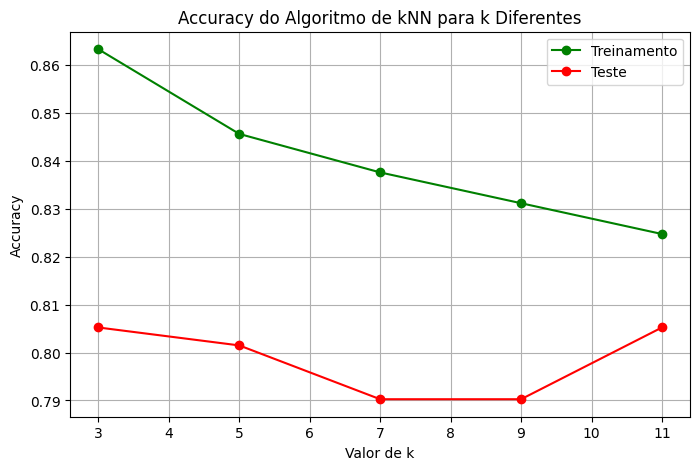

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(valores_K, train_accuracies, marker='o', label='Treinamento', linestyle='-', color='green')
plt.plot(valores_K, test_accuracies, marker='o', label='Teste', linestyle='-', color='red')
plt.title('Accuracy do Algoritmo de kNN para k Diferentes')
plt.xlabel('Valor de k')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

O melhor valor de K no algoritmo desenvolvido, é 3, pois é o que tem uma grande acurácia tanto de treinamento quanto de teste, sem maiores diferenças entre os valores.

### **Utilizando a Biblioteca KNeighborsClassifier**

O próximo passo foi utilizar a biblioteca KNeighborsClassifier para compararmos os resultados obtidos com ela com os que obtivemos antes. Para um resultado mais aproximado, utilizamos novamente k=5 no primeiro teste.

In [ ]:
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_training, y_training)

KNeighborsClassifier()

Calculamos as acurácias das duas bases para o valor de k=5.

In [ ]:
accuracy_train = knn.predict(X_training)
accuracy_test = knn.predict(X_test)

accuracy_train_percent = accuracy_score(y_training, accuracy_train)
accuracy_test_percent = accuracy_score(y_test, accuracy_test)

print(f'Accuracy nos dados de treinamento: {accuracy_train_percent * 100:.2f}%')
print(f'Accuracy nos dados de teste: {accuracy_test_percent * 100:.2f}%')

Accuracy nos dados de treinamento: 84.89%
Accuracy nos dados de teste: 79.40%


Após as acurácias do valor de k=5 serem calculadas, testamos para outros valores de k e percebemos que o melhor valor de k encontrado foi 3.

In [ ]:
valores_k = [1, 3, 5, 7, 9]
resultados_acuracia_treinamento = []
resultados_acuracia_teste = []

for k in valores_k:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_training, y_training)

    accuracy_train = knn.predict(X_training)
    accuracy_test = knn.predict(X_test)

    accuracy_train_percent = accuracy_score(y_training, accuracy_train)
    accuracy_test_percent = accuracy_score(y_test, accuracy_test)

    resultados_acuracia_treinamento.append(accuracy_train_percent)
    resultados_acuracia_teste.append(accuracy_test_percent)

for i in range(len(valores_k)):
    print(f'k = {valores_k[i]},\nAccuracy nos dados de treinamento: {resultados_acuracia_treinamento[i] * 100:.2f}%, \nAccuracy nos dados de teste: {resultados_acuracia_teste[i] * 100:.2f}%')
    print("\n")

k = 1,
Accuracy nos dados de treinamento: 89.23%, 
Accuracy nos dados de teste: 77.53%


k = 3,
Accuracy nos dados de treinamento: 85.37%, 
Accuracy nos dados de teste: 79.40%


k = 5,
Accuracy nos dados de treinamento: 84.89%, 
Accuracy nos dados de teste: 79.40%


k = 7,
Accuracy nos dados de treinamento: 83.28%, 
Accuracy nos dados de teste: 78.28%


k = 9,
Accuracy nos dados de treinamento: 83.60%, 
Accuracy nos dados de teste: 78.65%




Depois, plotamos o gráfico dos valores da acurácia de treinamento e teste, em função dos valores de k

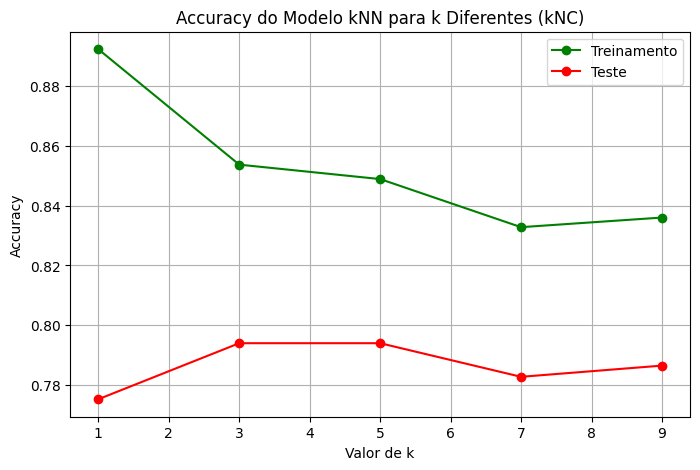

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(valores_k, resultados_acuracia_treinamento, marker='o', label='Treinamento', linestyle='-', color='green')
plt.plot(valores_k, resultados_acuracia_teste, marker='o', label='Teste', linestyle='-', color='red')

plt.xlabel('Valor de k')
plt.ylabel('Accuracy')
plt.title('Accuracy do Modelo kNN para k Diferentes (kNC)')
plt.legend()

plt.grid(True)
plt.show()

Pode-se notar que o melhor valor de K utlizando a biblioteca KNeighborsClassifier, é 3 novamente, o que reitera o resultado obtido "manualmente", utilizando a forma anterior.

## **Avaliação de Classificadores**

### Matriz de Confusão I

Com o Modelo kNN realizado, vamos então, analisar o modelo e suas métricas utilizando da Matriz de Confusão para analisar os resultados:


*   True Positive
*   False Positive
*   True Negative
*   False Negative

A partir da Matriz desenvolvida, podemos calcular as métricas do modelo sendo as seguintes:



*   Precision (Precisão do Modelo)
*   Recall (Cobertura do Modelo)
*   Accuracy (Acurácia do Modelo)
*   F1-Score (Resultado do Score do Modelo)

<Axes: >

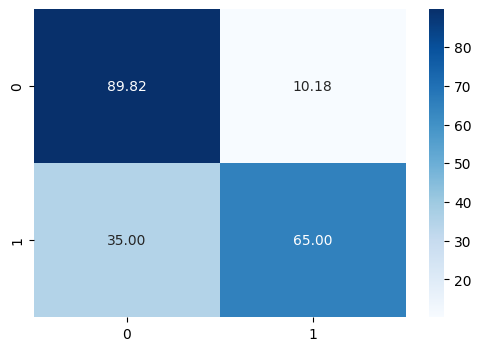

In [ ]:
plt.figure(figsize=(6, 4))
descricao1 = ['Positive', 'Negative']
descricao2 = ['True', 'False']

cfm_teste = confusion_matrix(y_test, etapa_teste)
cfm_teste_percent = (cfm_teste.astype('float') / cfm_teste.sum(axis=1)[:, np.newaxis]) * 100

sns.heatmap(cfm_teste_percent, annot=True, fmt=".2f" , cmap="Blues")

#### Métricas Dados de Teste

In [ ]:
print(classification_report(y_test, etapa_teste))

              precision    recall  f1-score   support

         0.0       0.81      0.90      0.85       167
         1.0       0.79      0.65      0.71       100

    accuracy                           0.81       267
   macro avg       0.80      0.77      0.78       267
weighted avg       0.80      0.81      0.80       267



Analisando os resultados da Precisão e do Recall do modelo de teste, vemos que a porcentagem da Precisão foi de 80% e a Cobertura foi de 81% do modelo, temos então que quando o modelo certou, ou seja, em 81% dos casos, os valores de cobertura, ou seja, o que faltou acertar, é baixo, já que a porcentagem de recall foi de 81%.

<Axes: >

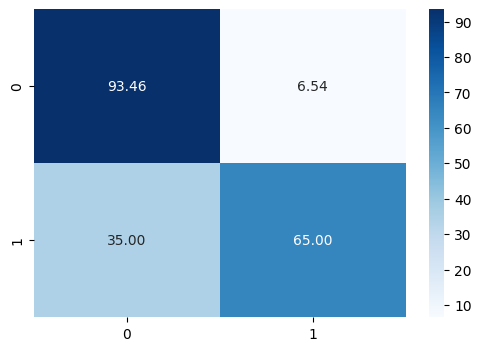

In [ ]:
plt.figure(figsize=(6, 4))
descricao1 = ['Positive', 'Negative']
descricao2 = ['True', 'False']

cfm_teste = confusion_matrix(y_training, etapa_treinamento)
cfm_treinamento_percent = (cfm_teste.astype('float') / cfm_teste.sum(axis=1)[:, np.newaxis]) * 100

sns.heatmap(cfm_treinamento_percent, annot=True, fmt=".2f", cmap="Blues")

#### Métricas Dados de Treinamento

In [ ]:
print(classification_report(y_training, etapa_treinamento))

              precision    recall  f1-score   support

         0.0       0.81      0.93      0.87       382
         1.0       0.86      0.65      0.74       240

    accuracy                           0.82       622
   macro avg       0.84      0.79      0.80       622
weighted avg       0.83      0.82      0.82       622



Já no modelo com os dados de treinamento, temos um valor de precisão de 83%, acima dos dados de teste, e também possuimos uma porcentagem maior em recall, com 82%, então podemos analisar que os dados treinados possuiram um maior desempenho na nossa análise.

### **K-Fold Cross Validation**

Implementamos um K-fold para utilizar cross validation no modelo k-NN aplicado acima, com 5 folds

In [ ]:
cross_val_scores = cross_val_score(knn, X, y, cv=5)

mean_accuracy = np.mean(cross_val_scores) * 100
std_accuracy = np.std(cross_val_scores) * 100

fold_accuracies = cross_val_scores * 100

fold_accuracies_formatted = ["{:.2f}%".format(acc) for acc in fold_accuracies]

print("Acurácias para cada fold em porcentagem:", fold_accuracies_formatted)
print("Acurácia Média em porcentagem: {:.2f}%".format(mean_accuracy))
print("Desvio Padrão da Acurácia em porcentagem: {:.2f}%".format(std_accuracy))

Acurácias para cada fold em porcentagem: ['78.09%', '81.46%', '80.90%', '78.09%', '79.66%']
Acurácia Média em porcentagem: 79.64%
Desvio Padrão da Acurácia em porcentagem: 1.39%


Avaliamos o modelo calculando as porcentagens das acurácias dos 5 folds além da acurácia média e do desvio padrão do mesmo.

####Encontrando o melhor valor de k

Agora, testamos os valores de k para um maior entendimento e facilitar o processo de encontrar o melhor valor outra vez.

In [ ]:
k_values = [1, 3, 5, 7, 9, 11, 13, 15]

mean_error_percentages = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)

    scores = cross_val_score(knn_model, X, y, cv=5)

    mean_error_percentage = (1 - np.mean(scores)) * 100
    mean_error_percentages.append(mean_error_percentage)

best_k = k_values[np.argmin(mean_error_percentages)]
min_mean_error_percentage = min(mean_error_percentages)

mean_error_percentages_formatted = ["{:.2f}%".format(err) for err in mean_error_percentages]

print("Valores de k testados:", k_values)
print("Erros médios em porcentagem:", mean_error_percentages_formatted)
print("Melhor valor de k:", best_k)
print("Menor erro médio em porcentagem: {:.2f}%".format(min_mean_error_percentage))

Valores de k testados: [1, 3, 5, 7, 9, 11, 13, 15]
Erros médios em porcentagem: ['23.51%', '20.92%', '19.57%', '21.03%', '20.36%', '20.14%', '19.46%', '19.24%']
Melhor valor de k: 15
Menor erro médio em porcentagem: 19.24%


Considerando os valores médios de erro e sabendo que o menor erro médio de 19.24% foi com k=15, foi possível avaliar que este era o melhor, como mostrado no código.

### Matriz de Confusão II

Com o Modelo K-Fold Cross Validation realizado, vamos então, analisar o modelo e suas métricas utilizando da Matriz de Confusão para analisar os resultados:


*   True Positive
*   False Positive
*   True Negative
*   False Negative

A partir da Matriz desenvolvida, podemos calcular as métricas do modelo sendo as seguintes:



*   Precision (Precisão do Modelo)
*   Recall (Cobertura do Modelo)
*   Accuracy (Acurácia do Modelo)
*   F1-Score (Resultado do Score do Modelo)

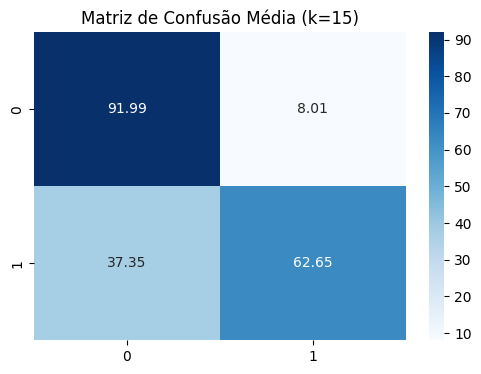

In [ ]:
knc_model = KNeighborsClassifier(n_neighbors=15)

y_pred = cross_val_predict(knc_model, X, y, cv=5)

confusion = confusion_matrix(y, y_pred)
confusion_percent = (confusion.astype('float') / confusion.sum(axis=1)[:, np.newaxis]) * 100

plt.figure(figsize=(6, 4))
descricao1 = ['Positive', 'Negative']
descricao2 = ['True', 'False']

sns.heatmap(confusion_percent, annot=True, fmt=".2f", cmap="Blues")
plt.title("Matriz de Confusão Média (k=15)")

plt.show()

Abaixo, podem ser vistas as métricas de avaliação da matriz de confusão que foram analisadas.

#### Métricas Dados II

In [ ]:
knc_model = KNeighborsClassifier(n_neighbors=15)

precision_scores = cross_val_score(knc_model, X, y, cv=5, scoring='precision')
recall_scores = cross_val_score(knc_model, X, y, cv=5, scoring='recall')
accuracy_scores = cross_val_score(knc_model, X, y, cv=5, scoring='accuracy')
f1_scores = cross_val_score(knc_model, X, y, cv=5, scoring='f1')

mean_precision = np.mean(precision_scores)*100
mean_recall = np.mean(recall_scores)*100
mean_accuracy = np.mean(accuracy_scores)*100
mean_f1 = np.mean(f1_scores)*100

print("Métricas com k=13 e validação cruzada (5 folds):\n")
print("Porcentagem da Média da Precisão (Precision): {:.2f}%".format(mean_precision))
print("Porcentagem da Média da Cobertura (Recall): {:.2f}%".format(mean_recall))
print("Porcentagem da Média da Acurácia (Accuracy): {:.2f}%".format(mean_accuracy))
print("Porcentagem da Média do F1-Score: {:.2f}%".format(mean_f1))

Métricas com k=13 e validação cruzada (5 folds):

Porcentagem da Média da Precisão (Precision): 83.08%
Porcentagem da Média da Cobertura (Recall): 62.65%
Porcentagem da Média da Acurácia (Accuracy): 80.76%
Porcentagem da Média do F1-Score: 71.17%


Analisando os resultados da Precisão e do Recall do modelo de teste, vemos que a porcentagem da Precisão foi de 83.08% e a Cobertura foi de 62.65% do modelo, temos então que quando o modelo acertou, ele identificou corretamente 62.65% dos casos. Como estamos desenvolvendo um modelo apenas para realizar uma análise exploratória dos dados, esta taxa de recall é aceitável, porém, caso estivessemos fazendo um projeto de alerta antecipado para desastres, teríamos de aumentar a taxa de recall.